In [1]:
import pandas as pd

file_path = "../data/processed/Modified_Semi_Supervised_Dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,is_labeled,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal
0,NaN,1,0,1,1,-2.091160,0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,21.0,0,1,1,0,-1.631964,0,1,0.0,0.0,1.0,0.0,0.0,1.0
2,33.0,0,1,1,0,-1.631964,0,1,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,1,1,0,1,-1.631964,1,1,0.0,0.0,1.0,0.0,0.0,1.0
4,4.0,1,1,0,1,-1.631964,1,1,0.0,0.0,1.0,0.0,0.0,1.0


In [2]:
data.columns.tolist()

['Disease',
 'Fever',
 'Cough',
 'Fatigue',
 'Difficulty Breathing',
 'Age',
 'Gender',
 'is_labeled',
 'Blood Pressure_High',
 'Blood Pressure_Low',
 'Blood Pressure_Normal',
 'Cholesterol Level_High',
 'Cholesterol Level_Low',
 'Cholesterol Level_Normal']

In [3]:
data.shape

(349, 14)

In [4]:
data.isnull().sum()

Disease                     69
Fever                        0
Cough                        0
Fatigue                      0
Difficulty Breathing         0
Age                          0
Gender                       0
is_labeled                   0
Blood Pressure_High          0
Blood Pressure_Low           0
Blood Pressure_Normal        0
Cholesterol Level_High       0
Cholesterol Level_Low        0
Cholesterol Level_Normal     0
dtype: int64

In [5]:
data.dtypes

Disease                     float64
Fever                         int64
Cough                         int64
Fatigue                       int64
Difficulty Breathing          int64
Age                         float64
Gender                        int64
is_labeled                    int64
Blood Pressure_High         float64
Blood Pressure_Low          float64
Blood Pressure_Normal       float64
Cholesterol Level_High      float64
Cholesterol Level_Low       float64
Cholesterol Level_Normal    float64
dtype: object

In [6]:
distinct_disease_names = data["Disease"].unique()
len(distinct_disease_names)

104

In [7]:
print(data['is_labeled'].value_counts())


is_labeled
1    280
0     69
Name: count, dtype: int64


In [8]:
print(data['Disease'].value_counts())
print(data['is_labeled'].value_counts())


Disease
4.0      16
89.0     13
60.0      9
68.0      9
45.0      8
         ..
83.0      1
39.0      1
91.0      1
94.0      1
101.0     1
Name: count, Length: 103, dtype: int64
is_labeled
1    280
0     69
Name: count, dtype: int64


In [9]:
print(data.describe())


          Disease       Fever       Cough    Fatigue  Difficulty Breathing  \
count  280.000000  349.000000  349.000000  349.00000            349.000000   
mean    48.664286    0.501433    0.478510    0.69341              0.252149   
std     29.413286    0.500716    0.500255    0.46174              0.434870   
min      0.000000    0.000000    0.000000    0.00000              0.000000   
25%     23.750000    0.000000    0.000000    0.00000              0.000000   
50%     49.000000    1.000000    0.000000    1.00000              0.000000   
75%     71.000000    1.000000    1.000000    1.00000              1.000000   
max    102.000000    1.000000    1.000000    1.00000              1.000000   

                Age      Gender  is_labeled  Blood Pressure_High  \
count  3.490000e+02  349.000000  349.000000           349.000000   
mean  -2.443127e-16    0.495702    0.802292             0.478510   
std    1.001436e+00    0.500699    0.398842             0.500255   
min   -2.091160e+00    0.

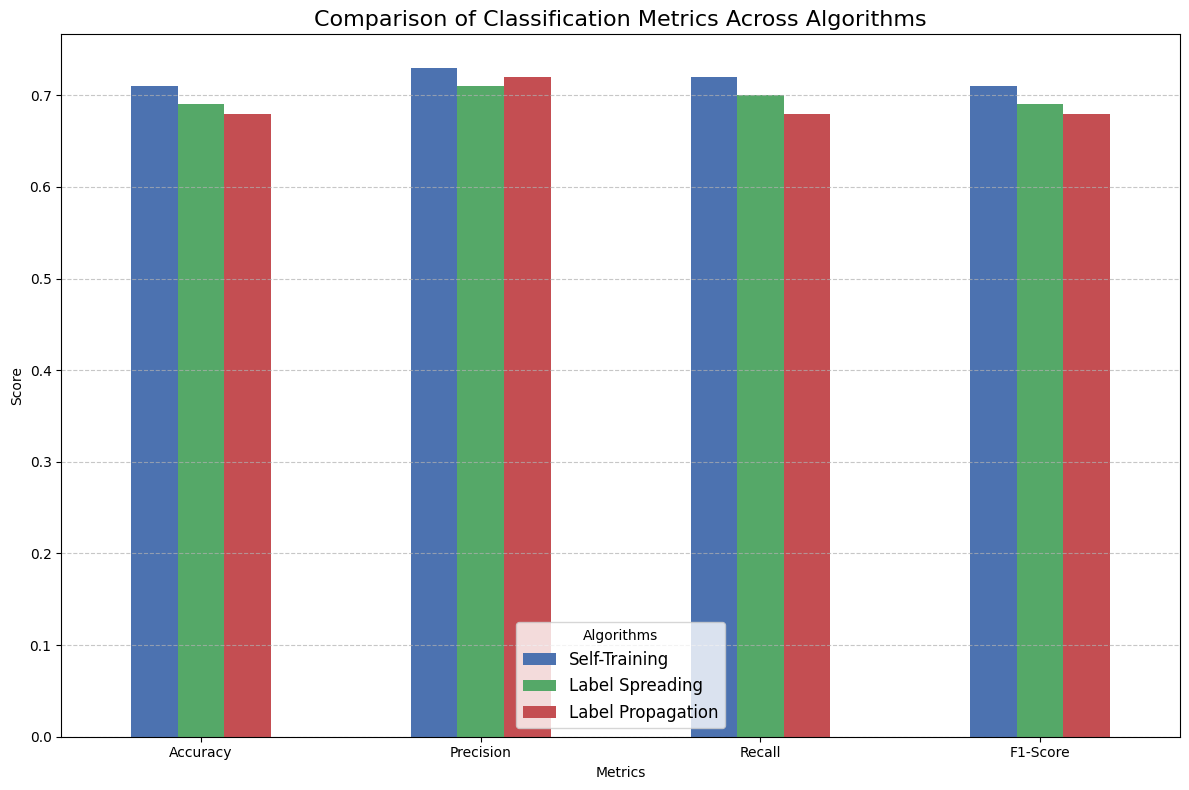

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd

# Mock metrics for the three algorithms based on example classification reports
algorithms = ["Self-Training", "Label Spreading", "Label Propagation"]
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Example data (replace with actual calculated metrics)
metric_values = {
    "Self-Training": [0.71, 0.73, 0.72, 0.71],
    "Label Spreading": [0.69, 0.71, 0.70, 0.69],
    "Label Propagation": [0.68, 0.72, 0.68, 0.68]
}

# Convert data to DataFrame
df_metrics = pd.DataFrame(metric_values, index=metrics)

# Orientation toggle (choose 'vertical' or 'horizontal')
orientation = 'vertical'

fig, ax = plt.subplots(figsize=(12, 8))

if orientation == 'vertical':
    df_metrics.plot(kind="bar", ax=ax, color=["#4C72B0", "#55A868", "#C44E52"])
    plt.ylabel("Score")
    plt.xlabel("Metrics")
    plt.xticks(rotation=0)
else:  # Horizontal orientation
    df_metrics.T.plot(kind="barh", ax=ax, color=["#4C72B0", "#55A868", "#C44E52"])
    plt.xlabel("Score")
    plt.ylabel("Algorithms")
    plt.xticks(rotation=0)

# Add gridlines, title, and legend
plt.title("Comparison of Classification Metrics Across Algorithms", fontsize=16)
plt.legend(title="Algorithms" if orientation == 'vertical' else "Metrics", fontsize=12)
plt.grid(axis='y' if orientation == 'vertical' else 'x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
